# Calculs avec des images

Nous avons vu dans le dernier chapitre que les images existent sous forme de tableaux Numpy. Nous allons voir ici différents types de calculs de traitement d'image que nous pouvons effectuer avec de tels tableaux, comme des opérations arithmétiques, la combinaison d'images, etc.

Nous avons vu dans le dernier chapitre que nous pouvions créer des images en utilisant par exemple la fonction ```np.random.random```. Créons deux petites images :

In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
image1 = np.ones((3,5))
image1

array([[1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.]])

In [3]:
image2 = np.random.random((3,5))
image2

array([[0.1389824 , 0.99979463, 0.82577042, 0.79474507, 0.23101268],
       [0.27034647, 0.01410389, 0.20435784, 0.0721552 , 0.61984191],
       [0.85459468, 0.58800162, 0.62462822, 0.01819988, 0.06607906]])

## Calculs simples

Pour rappel du chapitre précédent, nous avons vu que nous pouvions faire de l'arithmétique avec des images tout comme nous le ferions avec de simples nombres :

In [4]:
image1_plus = image1 + 3
image1_plus

array([[4., 4., 4., 4., 4.],
       [4., 4., 4., 4., 4.],
       [4., 4., 4., 4., 4.]])

Ceci est valable pour toutes les opérations de base comme l'addition, la multiplication, etc. Même l'élévation à une puissance donnée fonctionne :

In [5]:
image1_plus ** 2

array([[16., 16., 16., 16., 16.],
       [16., 16., 16., 16., 16.],
       [16., 16., 16., 16., 16.]])

## Combinaison d'images

Si les images ont la même taille, nous pouvons là encore les traiter comme de simples nombres et faire des opérations mathématiques avec elles : encore une fois addition, multiplication, etc. Par exemple :

In [6]:
image1 + image2

array([[1.1389824 , 1.99979463, 1.82577042, 1.79474507, 1.23101268],
       [1.27034647, 1.01410389, 1.20435784, 1.0721552 , 1.61984191],
       [1.85459468, 1.58800162, 1.62462822, 1.01819988, 1.06607906]])

## Fonctions pixel par pixel

En plus de nous permettre de créer différents types de tableaux, Numpy nous fournit également des fonctions qui peuvent opérer sur des tableaux. Dans de nombreux cas, l'entrée est une image et la sortie est une image de même taille où *une fonction donnée a été appliquée à chaque pixel individuel*. 

Par exemple, nous pourrions vouloir appliquer une fonction logarithmique à une image pour réduire la plage de valeurs que les pixels peuvent prendre. Ici, nous utiliserions la fonction ```np.log``` :

In [7]:
np.log(image2)

array([[-1.97340794e+00, -2.05388747e-04, -1.91438488e-01,
        -2.29733884e-01, -1.46528267e+00],
       [-1.30805091e+00, -4.26130469e+00, -1.58788269e+00,
        -2.62893591e+00, -4.78290819e-01],
       [-1.57127986e-01, -5.31025584e-01, -4.70598659e-01,
        -4.00634024e+00, -2.71690330e+00]])

Comme nous pouvons le voir, l'image d'entrée avait 3 lignes et 5 colonnes et l'image de sortie a les mêmes dimensions. Vous pouvez trouver de nombreuses fonctions dans Numpy qui fonctionnent de cette manière, par exemple pour prendre une exponentielle (```np.exp()```), pour faire de la trigonométrie (```np.cos()```, ```np.sin()```) etc.

## Statistiques d'image

Un autre type de fonctions prend une image en entrée mais renvoie une sortie de taille différente en calculant une statistique sur l'image ou des parties de celle-ci. Par exemple, nous pouvons calculer la moyenne de *toutes* les valeurs de pixels de ```image2``` :

In [8]:
np.mean(image2)

0.4215075982440046

Ou nous pouvons spécifier que nous voulons calculer la moyenne le long d'une certaine dimension de l'image, en 2D le long des colonnes ou des lignes. Rappelons-nous ce qu'est ```image2``` :

In [9]:
image2

array([[0.1389824 , 0.99979463, 0.82577042, 0.79474507, 0.23101268],
       [0.27034647, 0.01410389, 0.20435784, 0.0721552 , 0.61984191],
       [0.85459468, 0.58800162, 0.62462822, 0.01819988, 0.06607906]])

Maintenant, nous prenons la moyenne sur les colonnes, ce qui signifie le long du premier axe ou ```axis=0``` :

In [10]:
np.mean(image2, axis=0)

array([0.42130785, 0.53396671, 0.55158549, 0.29503338, 0.30564455])

La même logique s'applique à toutes les autres fonctions statistiques telles que la prise du minimum (```np.min()```), du maximum (```np.max()```), de l'écart-type (```np.std()```), de la médiane (```np.median()```) etc.

Notez que la plupart de ces fonctions peuvent également être appelées directement sur la variable du tableau Numpy. Par exemple

In [11]:
np.std(image2)

0.3362691013424119

et

In [12]:
image2.std()

0.3362691013424119

sont complètement équivalents. Dans le dernier cas, en utilisant la notation par points, vous pourriez entendre dire que ```std()``` est une *méthode* de ```image2```.

Enfin, nous pourrions vouloir examiner la distribution réelle des valeurs des pixels.
Pour cela, nous examinons l'[histogramme](https://fr.wikipedia.org/wiki/Histogramme) de l'image.

In [13]:
number_of_bins = 10
min_max = [0,1]
histogram,bins = np.histogram(image2.ravel(),number_of_bins,min_max)


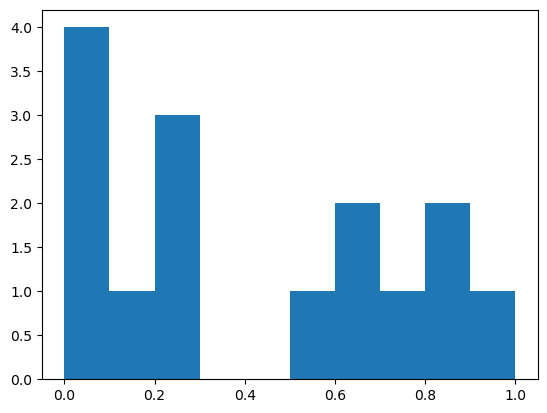

In [14]:
plt.hist(image2.ravel(), number_of_bins, min_max)
plt.show()

## Exercice

Dans le module ```numpy.random```, trouvez une fonction qui génère un bruit de **Poisson** et créez une image 4x9. Calculez sa moyenne et son écart-type.